<a href="https://colab.research.google.com/github/vietnguyen99/EMNIST-Hand-Written-Recognition-AI/blob/main/EMNIST_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/sorki/python-mnist
!./python-mnist/bin/mnist_get_data.sh
!pip3 install emnist
from emnist import extract_training_samples
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import cv2
from google.colab.patches import cv2_imshow
import numpy

Cloning into 'python-mnist'...
remote: Enumerating objects: 240, done.
remote: Total 240 (delta 0), reused 0 (delta 0), pack-reused 240
Receiving objects: 100% (240/240), 44.93 KiB | 754.00 KiB/s, done.
Resolving deltas: 100% (118/118), done.
--2020-12-14 19:58:46--  http://yann.lecun.com/exdb/mnist/
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 104.28.7.204, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/index.html.tmp’

index.html.tmp          [ <=>                ]  28.49K  --.-KB/s    in 0.001s  

2020-12-14 19:58:46 (47.2 MB/s) - ‘data/index.html.tmp’ saved [29175]

Loading robots.txt; please ignore errors.
--2020-12-14 19:58:46--  http://yann.lecun.com/robots.txt
Reusing existing connection to yann.lecun.com:80.
HTTP request sent, awaiting response... 404 Not Found
2020-12-14 19:58:46 ERROR 404: Not Found.

Removing data/ind

In [ ]:
# Grab the data from the OpenML website
# X will be our images and y will be the labels
X, y = extract_training_samples('letters')

# Make every pixel in all of the images in 0-1 range
X = X / 255

# Train the first 120k samples and rest of for testing
X_train, X_test = X[:120000], X[120000:]
y_train, y_test = y[:120000], y[120000:]

# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(120000,784)
X_test = X_test.reshape(-1,784)

Image Label: l


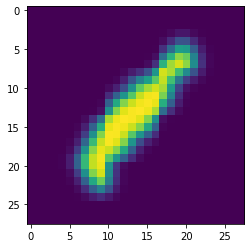

In [ ]:
# Look at an image in the training set
img_index = 8999        #<---------- Change the index for different letters

img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))


In [ ]:
# MLP with 6 hidden layer using ReLU and sets it to run through the data 100 times
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100, ), max_iter=50, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.001)

# Train
mlp.fit(X_train, y_train)
print("Training set score: %.2f" % mlp.score(X_train, y_train))
print("Validation set score: %.2f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.91011316
Iteration 2, loss = 0.46577509
Iteration 3, loss = 0.38315568
Iteration 4, loss = 0.34014784
Iteration 5, loss = 0.30935796
Iteration 6, loss = 0.28549147
Iteration 7, loss = 0.26858337
Iteration 8, loss = 0.25259691
Iteration 9, loss = 0.24041870
Iteration 10, loss = 0.22976217
Iteration 11, loss = 0.21714487
Iteration 12, loss = 0.20721911
Iteration 13, loss = 0.20053180
Iteration 14, loss = 0.19218773
Iteration 15, loss = 0.18594062
Iteration 16, loss = 0.17913850
Iteration 17, loss = 0.17146724
Iteration 18, loss = 0.16611445
Iteration 19, loss = 0.16031159
Iteration 20, loss = 0.15810837
Iteration 21, loss = 0.15096544
Iteration 22, loss = 0.14680200
Iteration 23, loss = 0.14328250
Iteration 24, loss = 0.13851969
Iteration 25, loss = 0.13470790
Iteration 26, loss = 0.13116775
Iteration 27, loss = 0.12709012
Iteration 28, loss = 0.12468189
Iteration 29, loss = 0.12283003
Iteration 30, loss = 0.11807687
Iteration 31, loss = 0.11524197
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.96
Validation set score: 0.89


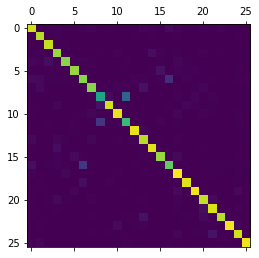

In [ ]:
# First initialize a list with all the predicted values from the training set
y_pred = mlp.predict(X_test)

# Visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

There were 60 times that the letter i was predicted to be the letter l.


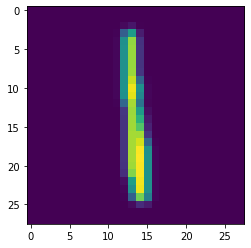

In [ ]:
# Change this to any letters that you think the neural network have a hard time confused with each other.
predicted_letter = 'l'
actual_letter = 'i'


# Put all the mistakes in the list and counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Change the index below to see different mistakes
mistake_index = 7

# Draw the mistake image
if (len(mistake_list)> mistake_index):
  img = X_test[mistake_list[mistake_index]]
  plt.imshow(img.reshape((28,28)))


Prediction: w


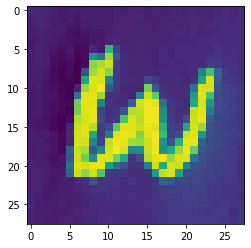

In [ ]:
# Get an Image
# Use this to get online images into Google Colab local drive: 
#!wget "replace this sentence with an image address"
img = cv2.imread("letter w.jpg", cv2.IMREAD_GRAYSCALE)  # Put the image name in the string "image name here"

#Preprocessing
#Invert the color to make background black and letter white
img = cv2.bitwise_not(img)

# Apply Gaussian blur filter
img = cv2.GaussianBlur(img, (7,7), 0)

# Resize and resample to be 28 x 28 pixels
img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)

# Normalize pixels and reshape 
img = img/255
img = img.reshape((28,28))

# Predict the letter
prediction = mlp.predict(numpy.array(img).reshape(-1,784))
print('Prediction: '+str(chr(prediction[0]+96)))
plt.imshow(img.reshape((28,28)))